In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [54]:
data_file = "conso.txt"

In [55]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)

In [56]:
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [57]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [58]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


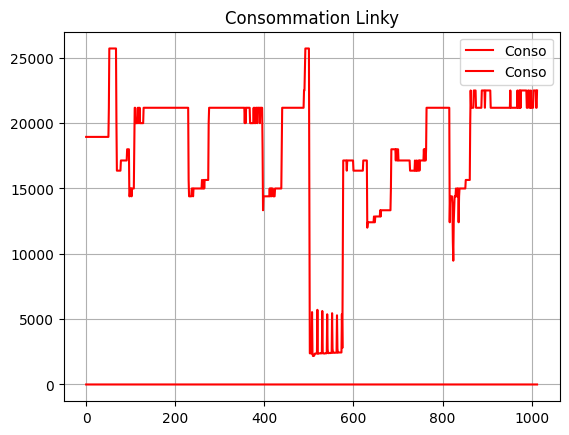

In [59]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [60]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [61]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  11398 non-null  int64  
 1   kWh       11398 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 178.2 KB


In [62]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
11393,25974,0.14
11394,25768,0.14
11395,25811,0.14
11396,25454,0.14


In [63]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
11393,25974,0.14,25.974,138.600139,296575944
11394,25768,0.14,25.768,139.708165,296601712
11395,25811,0.14,25.811,139.475417,296627523
11396,25454,0.14,25.454,141.431602,296652977


In [64]:
# index dernier echantillon
l=len(conso_data)-1
l

11397

In [65]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

296678464000

In [66]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data#.info()


,Interval,kWh,sec,Wh,cumul(ms),dates
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:21:07.167139
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:21:33.410139
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:21:59.295139
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:22:25.049139
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:22:50.823139
...,...,...,...,...,...,...
11393,25974,0.14,25.974,138.600139,296575944,2024-03-10 10:43:36.822139
11394,25768,0.14,25.768,139.708165,296601712,2024-03-10 10:44:02.590139
11395,25811,0.14,25.811,139.475417,296627523,2024-03-10 10:44:28.401139
11396,25454,0.14,25.454,141.431602,296652977,2024-03-10 10:44:53.855139


In [67]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:21:07.167139,
        Interval   kWh     sec         Wh  cumul(ms)                      dates
 11397     25487  0.14  25.487  141.24848  296678464 2024-03-10 10:45:19.342139)

In [68]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

time = conso_data['dates']
time


0       2024-03-07 00:21:07.167139
1       2024-03-07 00:21:33.410139
2       2024-03-07 00:21:59.295139
3       2024-03-07 00:22:25.049139
4       2024-03-07 00:22:50.823139
                   ...            
11393   2024-03-10 10:43:36.822139
11394   2024-03-10 10:44:02.590139
11395   2024-03-10 10:44:28.401139
11396   2024-03-10 10:44:53.855139
11397   2024-03-10 10:45:19.342139
Name: dates, Length: 11398, dtype: datetime64[ns]

In [69]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [70]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [71]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

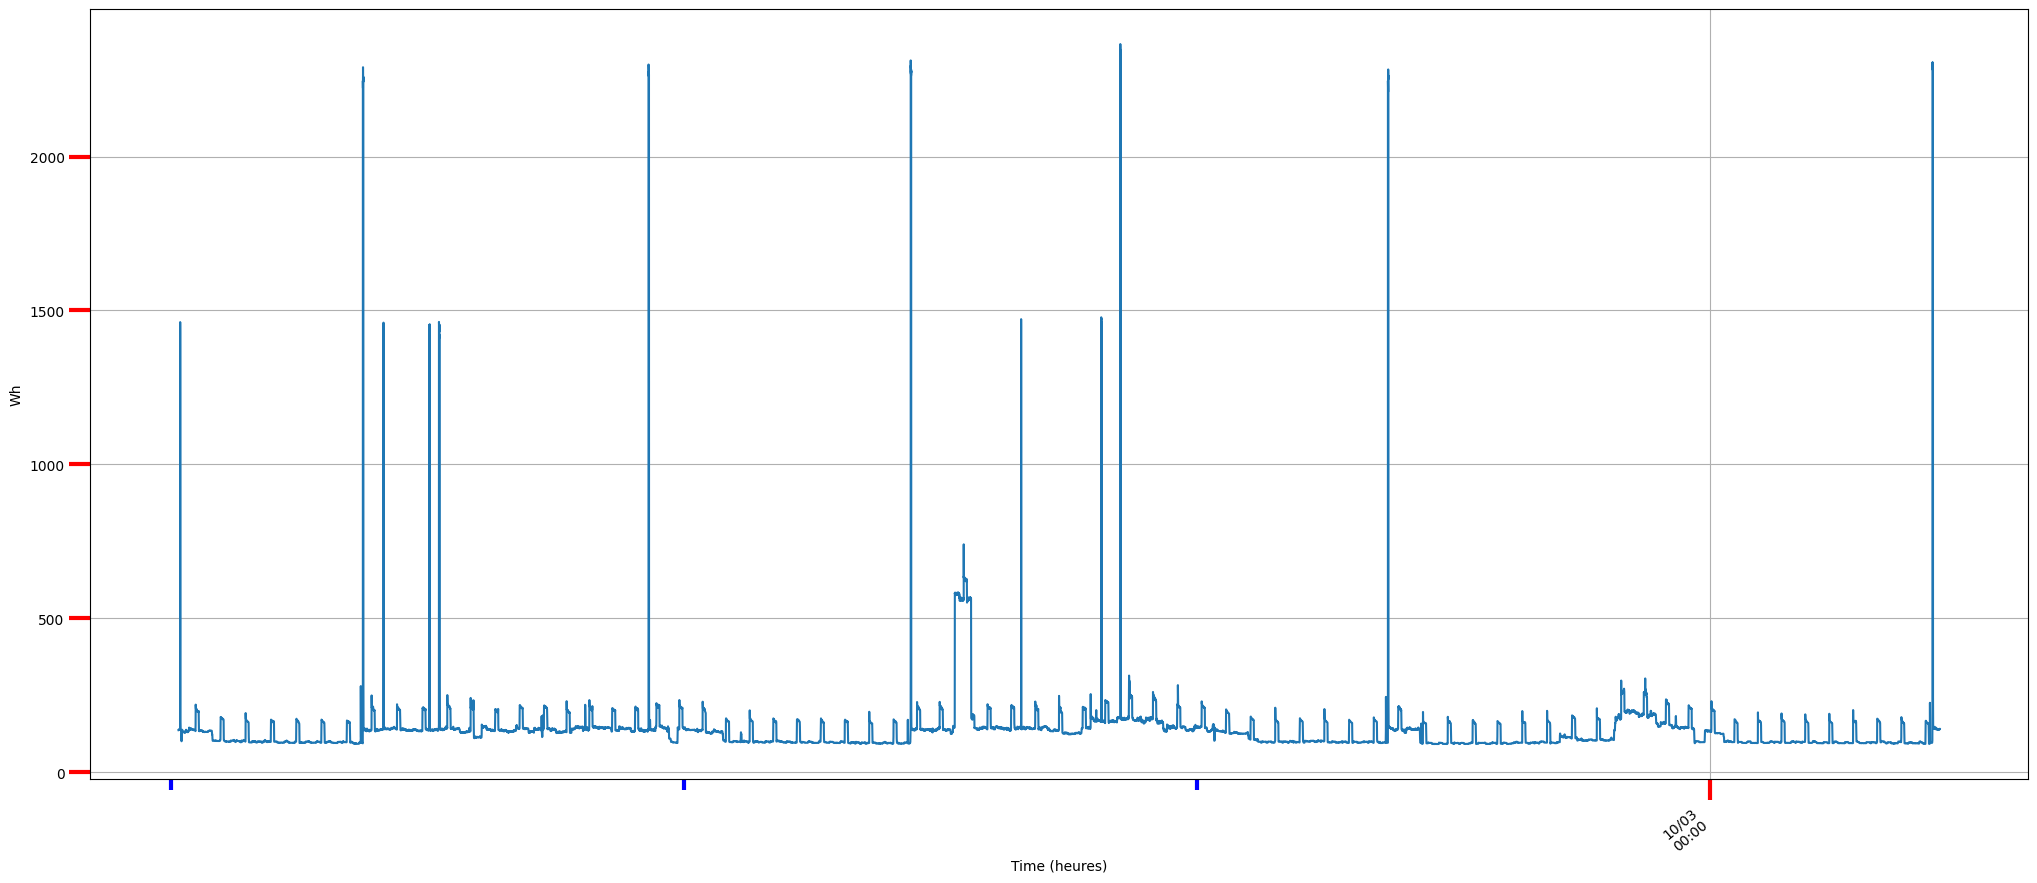

In [72]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [73]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates
11397,25487,0.14,25.487,141.24848,296678464,2024-03-10 10:45:19.342139


In [74]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

296678464000

# Slice of last 1 kWh

In [75]:
l = len(conso_data)  # total watt consommés
l

11398

In [76]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(11398, 1000)

In [77]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [78]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh  cumul(ms)  \
 10398     37685  0.09  37.685   95.528725  264895690   
 10399     37632  0.09  37.632   95.663265  264933322   
 10400     37729  0.09  37.729   95.417318  264971051   
 10401     37742  0.09  37.742   95.384452  265008793   
 10402     37541  0.09  37.541   95.895155  265046334   
 ...         ...   ...     ...         ...        ...   
 11393     25974  0.14  25.974  138.600139  296575944   
 11394     25768  0.14  25.768  139.708165  296601712   
 11395     25811  0.14  25.811  139.475417  296627523   
 11396     25454  0.14  25.454  141.431602  296652977   
 11397     25487  0.14  25.487  141.248480  296678464   
 
                            dates  
 10398 2024-03-10 01:55:36.568139  
 10399 2024-03-10 01:56:14.200139  
 10400 2024-03-10 01:56:51.929139  
 10401 2024-03-10 01:57:29.671139  
 10402 2024-03-10 01:58:07.212139  
 ...                          ...  
 11393 2024-03-10 10:43:36.822139  
 11394 2024-03-10 1

In [79]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [80]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [81]:
cumtime_end,cumtime_start

(296678464000, 264933322000)

In [82]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

31745142000

In [83]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 10, 10, 45, 20, 343744),
 datetime.datetime(2024, 3, 10, 1, 56, 15, 201744),
 '10/03/2024 10:45:19')

In [84]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('10/03/2024 01:56:14', '10/03/2024 10:45:19')

In [85]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-10 01:55:36.568139', '2024-03-10 10:45:19.342139')

In [86]:
k

1

In [87]:
data.Interval.tail(1000)

10398    37685
10399    37632
10400    37729
10401    37742
10402    37541
         ...  
11393    25974
11394    25768
11395    25811
11396    25454
11397    25487
Name: Interval, Length: 1000, dtype: int64

In [88]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.83901638888889, 2.7152342459924914, 8, 50, 20)

In [89]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates
10398,37685,0.09,37.685,95.528725,264895690,2024-03-10 01:55:36.568139
10399,37632,0.09,37.632,95.663265,264933322,2024-03-10 01:56:14.200139
10400,37729,0.09,37.729,95.417318,264971051,2024-03-10 01:56:51.929139
10401,37742,0.09,37.742,95.384452,265008793,2024-03-10 01:57:29.671139
10402,37541,0.09,37.541,95.895155,265046334,2024-03-10 01:58:07.212139
...,...,...,...,...,...,...
11393,25974,0.14,25.974,138.600139,296575944,2024-03-10 10:43:36.822139
11394,25768,0.14,25.768,139.708165,296601712,2024-03-10 10:44:02.590139
11395,25811,0.14,25.811,139.475417,296627523,2024-03-10 10:44:28.401139
11396,25454,0.14,25.454,141.431602,296652977,2024-03-10 10:44:53.855139


<Axes: >

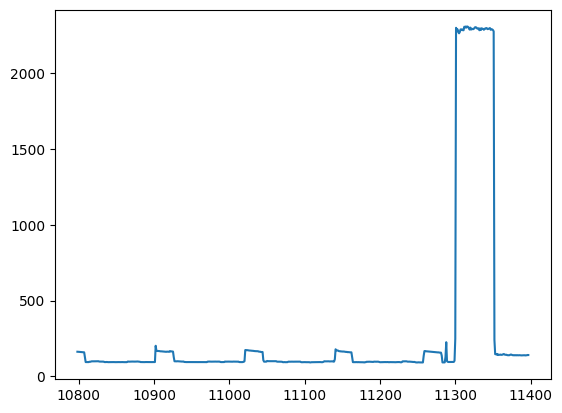

In [90]:
data.tail(600)['Wh'].plot()

In [91]:
data['Wh']

10398     95.528725
10399     95.663265
10400     95.417318
10401     95.384452
10402     95.895155
            ...    
11393    138.600139
11394    139.708165
11395    139.475417
11396    141.431602
11397    141.248480
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

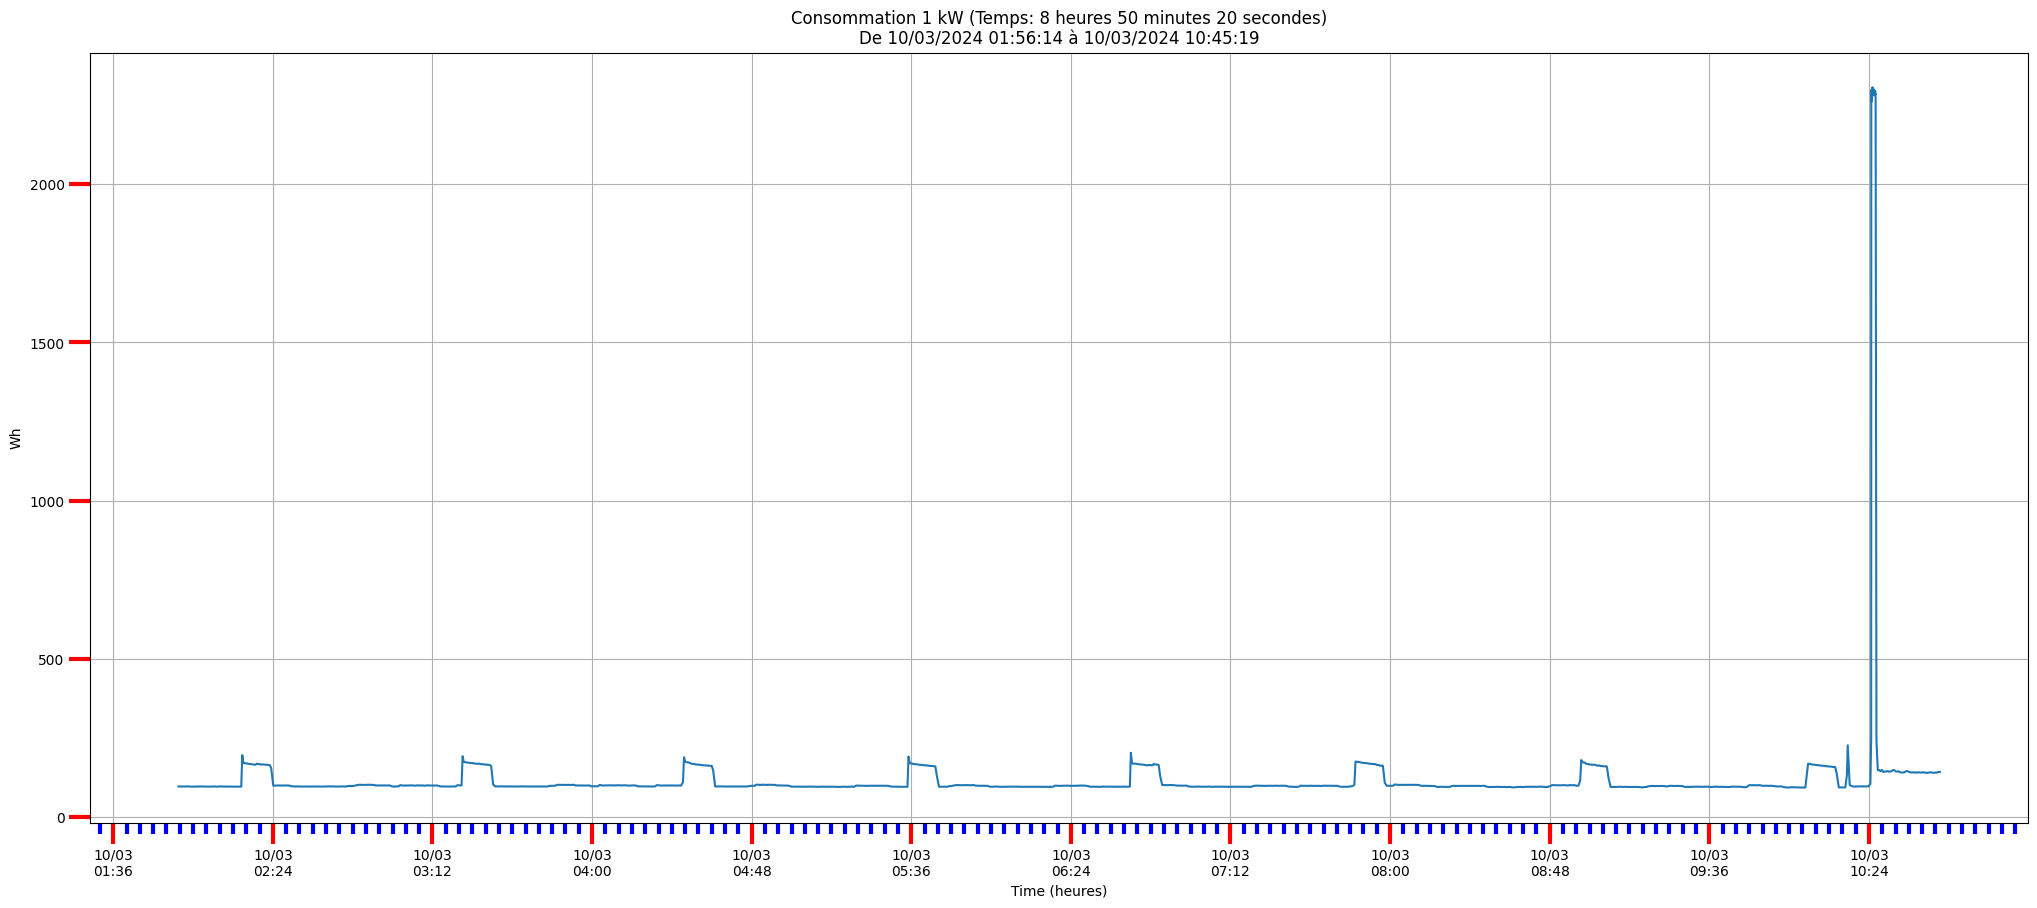

In [92]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

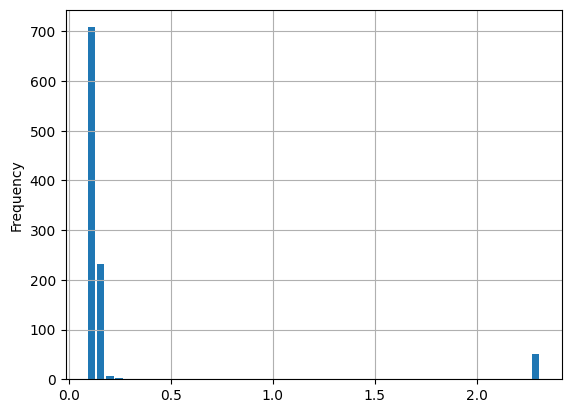

In [93]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [94]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates
11393,25974,0.14,25.974,138.600139,296575944,2024-03-10 10:43:36.822139
11394,25768,0.14,25.768,139.708165,296601712,2024-03-10 10:44:02.590139
11395,25811,0.14,25.811,139.475417,296627523,2024-03-10 10:44:28.401139
11396,25454,0.14,25.454,141.431602,296652977,2024-03-10 10:44:53.855139
11397,25487,0.14,25.487,141.248480,296678464,2024-03-10 10:45:19.342139


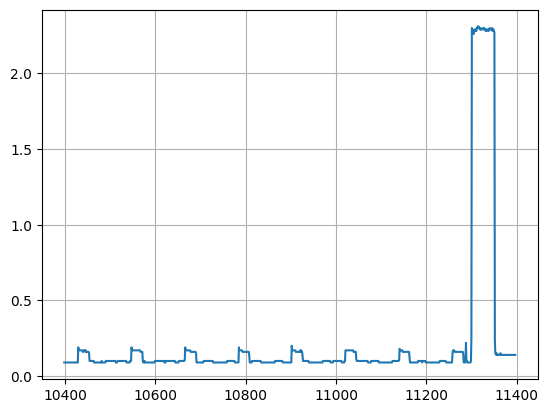

In [95]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [96]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(296678464000.0, 4944.641066666667)

In [97]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 10, 10, 45, 26, 26376),
 datetime.datetime(2024, 3, 7, 0, 20, 47, 562376))

In [98]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(11398, 296679, 82.41083333333333)

In [99]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [100]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [101]:
732/12 # 60 jours

61.0

In [102]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

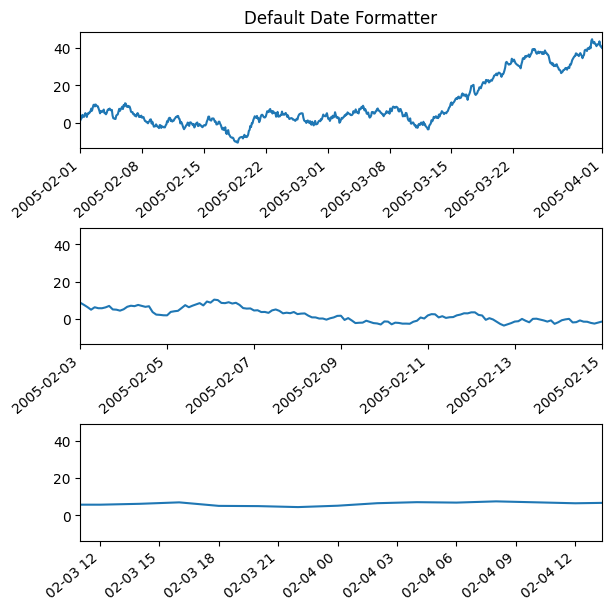

In [103]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [104]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)